In [1]:
import pandas as pd
import numpy as np
import math
from collections import defaultdict
import ts_code.nsfg as nsfg
import ts_code.thinkstats2 as thinkstats2
import ts_code.thinkplot as thinkplot
import ts_code.brfss as brfss
import matplotlib.pyplot as plt
%matplotlib inline

## Chapter 8 - Estimation

If asked to guess the mean of a distribution from a sample of that distribution, one choice would be to use the sample mean, $\bar{x}$ as an estimate of the mean parameter, $\mu$. This process is **estimation** and the sample mean is called an **estimator**.

Now, if we knew the distribution was susceptible to outliers, the sample mean might not be the best estimator, maybe we would want to use the median, or we could identify and discard outliers in our sample.

Which estimator is best depends on the circumstances (for example, whether
there are outliers) and on what the goal is. Are you trying to minimize errors,
or maximize your chance of getting the right answer?

If there are no outliers, the sample mean minimizes the **mean squared error** (MSE). That is, if we estimate the distribution many times, and each time compute the error $\bar{x}-\mu$, the sample mean minimizes;

$$MSE = \frac{1}{m}\sum (\bar{x}-\mu)^{2}$$

where $m$ is the number of time we estimate.

The **root mean squared error** is the square root of the MSE and is frequently used measure of the differences between values (sample and population values) predicted by a model or an estimator and the values actually observed.

Minimizing MSE is a nice property, but it's not always the best strategy.

For example, suppose we are estimating the distribution of wind speeds at a
building site. If the estimate is too high, we might overbuild the structure,
increasing its cost. But if it's too low, the building might collapse. Because
cost as a function of error is not symmetric, minimizing MSE is not the best
strategy.

When guessing the variance of a population $\sigma^{2}$, the obvious choise again is to use the sample variance $S^{2}$.

$$S^{2} = \frac{1}{n}\sum(x_{i}-\bar{x})^{2}$$

For large samples, $S^{2}$ is an adequate estimator, but for small samples it tends to be too low. Because of this unfortunate property, it is called a **biased estimator**. An estimator is **unbiased** if the expected total (or mean) error, after many iterations of the estimating, is 0.

Fortunately, there is another simple statistic that is an unbiased estimator
of $\sigma^{2}$:

$$S_{n-1}^{2} = \frac{1}{n-1}\sum(x_{i} - \bar{x})^{2}$$

Variation in the estimate caused by random selection is called **sampling error**. To quantify sampling error, we can simulate the sampling process with hypothetical values of $\mu$ and $\sigma$ and see how much $\bar{x}$ varies.

Each iteration, we choose $n$ values from a normal distribution with the given parameter and compute the sample mean. After running $m$ iterations, we compute the CDF of the estimates.

This distribution is called the **sampling distribution** of the estimator. It shows how much the estimates would vary if we ran the experiment over and over.

There are two common ways to summarize the sampling distribution:
    
+ **Standard error** (SE) is a measure of how far we expect the estimate to be off, on average. For each simulated experiment, we compute the error, $\bar{x}-\mu$, and then compute the root mean squared error (RMSE).

+ A **confidence interval** (CI) is a range that includes a given fraction of the sampling distribution. For example, the 90% confidence interval is the range from the 5th to the 95th percentile.

*Note:* People often think that there is a 90% probability that the actual parameter, $\mu$, falls in the 90% confidence interval. Sadly, that is not true.

The sampling distribution does not account for other sources of error, notably sampling bias and measurement error.

**Sampling bias** occurs when a sample is collected in such a way that some members of the intended population are less likely to be included than others. One example of this is telephone sampling which can miss people without phones(who tend t be poorer than average), people with unlisted numbers(richer), or people with day jobs if you call during business hours.

This sampling process is also vulnerable to self-selection, which is a kind of
sampling bias. Some people will refuse to answer the question, and if the
tendency to refuse is related to weight, that would affect the results.

Finally, if you ask people how much they weigh, rather than weighing them, the results might not be accurate. Even helpful respondents might round up or down if they are uncomfortable with their actual weight. And not all respondents are helpful. These inaccuracies are examples of **measurement error**.

What about estimating the parameters of an exponential distribution. Well, to estimate $\lambda$, we know that the mean of an exponential distribution is $\frac{1}{\lambda}$, so we might use'

$$L = \frac{1}{\bar{x}}$$

$L$ is an estimator of $\lambda$ and it is actually the maximum likelihood estimator. So, to maximize your change of guessing $\lambda$ exactly, use $L$.

$L$ unfortunately relies on $\bar{x}$, which we know if not rbout in the presence of outliear. What if we choose an alternative based on the median? The median of an exponential distribution is $\frac{ln(2)}{\lambda}$, so our estimator would be;

$$L_{m} = \frac{ln(2)}{m}$$

where $m$ is the sample median.

Both estimators are actually biased and neither converges to 0 as we increase our trials.

It turns out that $\bar{x}$ is an unbiased estimator of the mean of the distribution, $\frac{1}{\lambda}$, but $L$ is not an unbiased estimator of $\lambda$.

### Exercises

**Exercise 8.1** In this chapter we used $\bar{x}$ and median to estimate $\mu$, and found that $\bar{x}$ yields lower MSE. Also, we used $S^{2}$ and $S_{n-1}^{2}$ to estimate $\sigma$, and found that $S^{2}$ is biased and $S_{n-1}^{2}$ unbiased.

Run similar experiments to see if $\bar{x}$ and median are biased estimates of $\mu$. 

>Based on the experiments both are fiarly unbiased, as the sample size and trials increased, the means error came closer to zero.

Also check whether $S^{2}$ or $S_{n-1}^{2}$ yields a lower MSE.

>$S_{n-1}^{2}$ resulted in a lower MSE in each trial.

In [191]:
def mean_median_estimate(n=10, m=1000, mu=0, sigma=1):
    mean_estimates = []
    median_estimates = []
    for t in range(m):
        X = np.random.normal(mu, sigma, n)
        mean = np.mean(X)
        median = np.median(X)
        mean_estimates.append(mean)
        median_estimates.append(median)
    print('mean error of sample mean for sample size: '+str(n)+' and '+str(m)+' trials: ', 
          np.subtract(mean_estimates, mu).mean())
    print('mean error of sample median for sample size: '+str(n)+' and '+str(m)+' trials: ', 
          np.subtract(median_estimates, mu).mean())

In [192]:
n_m = [(7, 1000), (7, 1000), (7, 10000), (7, 100000)]

In [193]:
for n, m in n_m:
    mean_median_estimate(n,m)

mean error of sample mean for sample size: 7 and 1000 trials:  -0.000160512580411
mean error of sample median for sample size: 7 and 1000 trials:  0.00677457950977
mean error of sample mean for sample size: 7 and 1000 trials:  -0.020577932727
mean error of sample median for sample size: 7 and 1000 trials:  -0.0303605773945
mean error of sample mean for sample size: 7 and 10000 trials:  0.00137308233279
mean error of sample median for sample size: 7 and 10000 trials:  0.002285420476
mean error of sample mean for sample size: 7 and 100000 trials:  -0.00148529549334
mean error of sample median for sample size: 7 and 100000 trials:  -0.00116701425831


In [194]:
def var_estimate(n=10, m=1000, mu=0, sigma=1):
    biased_S = []
    unbiased_S = []
    for t in range(m):
        X = np.random.normal(mu, sigma, n)
        bias_S = np.var(X)
        unbias_S = np.var(X, ddof=1)
        biased_S.append(bias_S)
        unbiased_S.append(unbias_S)
    biased_MSE = np.square(np.subtract(biased_S, sigma**2)).mean()
    unbiased_MSE = np.square(np.subtract(unbiased_S, sigma**2)).mean()
    print('mean squared error of sample SD for sample size: '+str(n)+' and '+str(m)+' trials: ', 
          biased_MSE)
    print('mean error of sample SD(n-1) for sample size: '+str(n)+' and '+str(m)+' trials: ', 
          unbiased_MSE)    

In [195]:
for n, m in n_m:
    var_estimate(n,m)

mean squared error of sample SD for sample size: 7 and 1000 trials:  0.287542503884
mean error of sample SD(n-1) for sample size: 7 and 1000 trials:  0.373229649492
mean squared error of sample SD for sample size: 7 and 1000 trials:  0.242999123981
mean error of sample SD(n-1) for sample size: 7 and 1000 trials:  0.309269986138
mean squared error of sample SD for sample size: 7 and 10000 trials:  0.263448340844
mean error of sample SD(n-1) for sample size: 7 and 10000 trials:  0.330329729153
mean squared error of sample SD for sample size: 7 and 100000 trials:  0.267314572266
mean error of sample SD(n-1) for sample size: 7 and 100000 trials:  0.33703282407


**Exercise 8.2** Suppose you draw a sample with size $n = 10$ from an exponential distribution with $\lambda = 2$. Simulate this experiment 1000 times and plot the sampling distribution of the estimate $L$. 

Compute the standard error of the estimate and the 95% confidence interval.

Repeat the experiment with a few different values of $n$ and make a plot of standard error versus $n$.

In [28]:
from scipy.stats import expon

In [196]:
def L_estimation(n=10, m=1000, lam=2, prnt=True):
    scale = 1/lam
    L_estimates = []
    for t in range(m):
        X = expon.rvs(scale=scale,size=n)
        L = 1/X.mean()
        L_estimates.append(L)
    MSE = np.mean(np.square(np.subtract(L_estimates, lam)))
    RMSE = math.sqrt(MSE)
    CI_low = np.mean(L_estimates) * (1 - (1.96/math.sqrt(n)))
    CI_high = np.mean(L_estimates) * (1 + (1.96/math.sqrt(n)))
    if prnt:
        print('standard error of L for sample size: '+str(n)+' and '+str(m)+' trials: ', 
          RMSE)
        print('95% CI of L for sample size: '+str(n)+' and '+str(m)+' trials: ', 
          (CI_low, CI_high))
    return RMSE

In [197]:
L_estimation()

standard error of L for sample size: 10 and 1000 trials:  0.8215429545508074
95% CI of L for sample size: 10 and 1000 trials:  (0.84352998031432036, 3.5938410210842537)


0.8215429545508074

In [198]:
ns = np.arange(10, 1001, 10)

In [199]:
SE = []
for n in ns:
    SE.append(L_estimation(n, prnt=False))

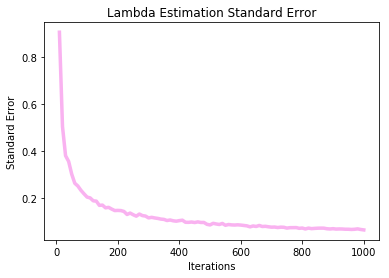

In [201]:
plt.plot(ns, SE, c='#F9B2F0', lw = 3.5)
plt.xlabel('Iterations')
plt.ylabel('Standard Error')
plt.title('Lambda Estimation Standard Error');

**Exercise 8.3** In games like hockey and soccer, the time between goals is roughly exponential. So you could estimate a team's goal-scoring rate by observing the number of goals they score in a game. This estimation process
is a little different from sampling the time between goals, so let's see how it works.

Write a function that takes a goal-scoring rate, **lam**, in goals per game, and
simulates a game by generating the time between goals until the total time exceeds 1 game, then returns the number of goals scored.

Write another function that simulates many games, stores the estimates of **lam**, then computes their mean error and RMSE. Is this way of making an estimate biased?

> RMSE is 1.415, the mean error is small, and becomes smaller with more trials, so it seems an unbiased estimate.

Plot the sampling distribution of the estimates. 

What is the standard error? What happens to sampling error for increasing values of **lam**?

>As we increase the rate of goals per game, the SE increases. 

In [219]:
import random

In [275]:
def simulate_game(lam):
    game_finished = False
    goals = 0
    time = 0 #time is essentially game played
    while game_finished == False:
        time_between_goals = random.expovariate(lam) #expon.rvs(scale=1/lam,size=1)[0]->this was slow
        time += time_between_goals
        
        if time > 1:
            game_finished = True
            break
            
        goals += 1
    return goals

In [276]:
def many_games(lam, m=100000):
    L_estimates = []
    for i in range(m):
        L_estimates.append(simulate_game(lam))
        
    ME = np.mean(np.subtract(L_estimates, lam))
    MSE = np.square(np.subtract(L_estimates, lam)).mean()
    RMSE = math.sqrt(MSE)
    
    return ME, RMSE, L_estimates

In [277]:
ME, RMSE, L_estimates = many_games(2, 1000000)

In [278]:
print('Mean Error and RMSE for L over 1000 simulated games: ', (ME, RMSE))

Mean Error and RMSE for L over 1000 simulated games:  (-0.001372, 1.4150540625714625)


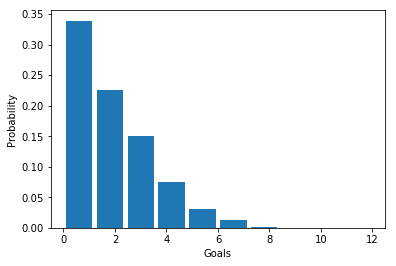

In [279]:
Ls = pd.Series(L_estimates)
Ls.hist(normed=True, grid=False, rwidth=0.85)
plt.xlabel('Goals')
plt.ylabel('Probability');

In [282]:
lams = [2, 3, 5, 8, 10, 12]

for lam in lams:
    ME, RMSE, L_estimates = many_games(lam, 1000000)
    print(str(lam)+'Mean Error and RMSE for L over 1000 simulated games: ', (ME, RMSE))

2Mean Error and RMSE for L over 1000 simulated games:  (-0.000638, 1.4149275599831956)
3Mean Error and RMSE for L over 1000 simulated games:  (0.00086399999999999997, 1.7315969507942661)
5Mean Error and RMSE for L over 1000 simulated games:  (0.0017700000000000001, 2.237910185865376)
8Mean Error and RMSE for L over 1000 simulated games:  (-0.0048260000000000004, 2.8269892111573403)
10Mean Error and RMSE for L over 1000 simulated games:  (0.0048859999999999997, 3.1660385341937958)
12Mean Error and RMSE for L over 1000 simulated games:  (0.0046730000000000001, 3.467450792729437)


### Glossary

**estimation:** The process of inferring the parameters of a distribution from a sample.

**estimator:** A statistic used to estimate a parameter.

**mean squared error (MSE):** A measure of estimation error.

**root mean squared error (RMSE):** The square root of MSE, a more meaningful representation of typical error magnitude.

**maximum likelihood estimator (MLE):** An estimator that computes the point estimate most likely to be correct.

**bias (of an estimator):** The tendency of an estimator to be above or below the actual value of the parameter, when averaged over repeated experiments.

**sampling error:** Error in an estimate due to the limited size of the sample and variation due to chance.

**sampling bias:** Error in an estimate due to a sampling process that is not representative of the population.

**measurement error:** Error in an estimate due to inaccuracy collecting or recording data.

**sampling distribution:** The distribution of a statistic if an experiment is repeated many times.

**standard error:** The RMSE of an estimate, which quantifies variability due to sampling error (but not other sources of error).

**confidence interval:** An interval that represents the expected range of an estimator if an experiment is repeated many times.